In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from os import listdir
from skimage import io
##from scipy.misc import imresize
import keras
#from keras.optimizer_v1 import Adam
from tensorflow.keras.optimizers import Adam
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import resize 
from keras.utils import np_utils

'basePath' consists the path to he image folder which has another 60 image folders.

In [ ]:
basePath='/content/drive/My Drive/TB_Caverns_Data/train_jpgs_folders'       

In [ ]:
# y_path is the path to the csv file which has labels for the images. 

'y_path' is the path to the csv file which has labels information. There are 3 different labels assigned for a single image namely *thick_walls, has_calcification, foci_around*. All the images in a single image folder (TRN image folders ) have the same the labels. This csv file, 'new_y_train', has the label infomation for each folder. This program uses ***'thick_walls'***  as the labels for the classification of images. But by changing the y label the classfication can be done for the other two labels as well.

In [ ]:
y_path='/content/drive/My Drive/new_y_train.csv'

In [ ]:
df=pd.read_csv(y_path)
df=pd.DataFrame(df)

In [ ]:
df=df[0:60]  
print(df)

        ID  thick_walls  has_calcification  foci_around
0   TRN_00            1                  1            1
1   TRN_01            1                  1            1
2   TRN_02            1                  0            0
3   TRN_03            0                  0            1
4   TRN_04            1                  1            0
5   TRN_05            1                  1            0
6   TRN_06            0                  0            1
7   TRN_07            1                  1            1
8   TRN_08            1                  1            1
9   TRN_09            1                  0            1
10  TRN_10            1                  1            0
11  TRN_11            1                  0            0
12  TRN_12            1                  0            1
13  TRN_13            1                  0            1
14  TRN_14            0                  1            0
15  TRN_15            0                  0            1
16  TRN_16            0                  0      

In [ ]:
img_folders=os.listdir(basePath)

In [ ]:
print(img_folders)

['TRN_53', 'TRN_28', 'TRN_29', 'TRN_55', 'TRN_12', 'TRN_56', 'TRN_25', 'TRN_08', 'TRN_27', 'TRN_44', 'TRN_17', 'TRN_06', 'TRN_30', 'TRN_59', 'TRN_45', 'TRN_31', 'TRN_14', 'TRN_33', 'TRN_39', 'TRN_36', 'TRN_38', 'TRN_51', 'TRN_19', 'TRN_47', 'TRN_49', 'TRN_26', 'TRN_07', 'TRN_41', 'TRN_23', 'TRN_58', 'TRN_21', 'TRN_18', 'TRN_42', 'TRN_52', 'TRN_50', 'TRN_10', 'TRN_15', 'TRN_43', 'TRN_40', 'TRN_32', 'TRN_54', 'TRN_20', 'TRN_04', 'TRN_13', 'TRN_09', 'TRN_05', 'TRN_22', 'TRN_34', 'TRN_46', 'TRN_03', 'TRN_35', 'TRN_48', 'TRN_37', 'TRN_11', 'TRN_57', 'TRN_24', 'TRN_00', 'TRN_01', 'TRN_16', 'TRN_02']


In [ ]:
img_folders.sort()
print(img_folders)

['TRN_00', 'TRN_01', 'TRN_02', 'TRN_03', 'TRN_04', 'TRN_05', 'TRN_06', 'TRN_07', 'TRN_08', 'TRN_09', 'TRN_10', 'TRN_11', 'TRN_12', 'TRN_13', 'TRN_14', 'TRN_15', 'TRN_16', 'TRN_17', 'TRN_18', 'TRN_19', 'TRN_20', 'TRN_21', 'TRN_22', 'TRN_23', 'TRN_24', 'TRN_25', 'TRN_26', 'TRN_27', 'TRN_28', 'TRN_29', 'TRN_30', 'TRN_31', 'TRN_32', 'TRN_33', 'TRN_34', 'TRN_35', 'TRN_36', 'TRN_37', 'TRN_38', 'TRN_39', 'TRN_40', 'TRN_41', 'TRN_42', 'TRN_43', 'TRN_44', 'TRN_45', 'TRN_46', 'TRN_47', 'TRN_48', 'TRN_49', 'TRN_50', 'TRN_51', 'TRN_52', 'TRN_53', 'TRN_54', 'TRN_55', 'TRN_56', 'TRN_57', 'TRN_58', 'TRN_59']


In [ ]:
print(len(img_folders))

60


TRN are the image folder names. There are 60 image folders. 

In [ ]:
img_size=64
TRN_start=0 # Starting TRN folder 
TRN_end=60  # Ending TRN folder
batch_size=50
epochs=20

In [ ]:
img_folders=img_folders[TRN_start:TRN_end]

In [ ]:
print(len(img_folders))

60


In [ ]:
a=0
image_set=[]
for i in img_folders:
  for j in os.listdir(os.path.join(basePath,i)):
    #img_len=len(os.listdir(os.path.join(basePath,i)))
    image=io.imread(basePath+'/'+i+'/'+j)
    image_set.append(resize(image,(img_size,img_size,3)))
    #image_set.append(image)
    a=a+1
    #print(j)
    #print(i)
    #a+=1
  

#print(image)

In [ ]:
# Selecting TRN image folders
df1=df.iloc[TRN_start:TRN_end,1:] 

In [ ]:
print(df1)

    thick_walls  has_calcification  foci_around
0             1                  1            1
1             1                  1            1
2             1                  0            0
3             0                  0            1
4             1                  1            0
5             1                  1            0
6             0                  0            1
7             1                  1            1
8             1                  1            1
9             1                  0            1
10            1                  1            0
11            1                  0            0
12            1                  0            1
13            1                  0            1
14            0                  1            0
15            0                  0            1
16            0                  0            1
17            1                  1            0
18            1                  1            0
19            1                  0      

From the label information of the TRN image folders the labels for each image has to be created. 

In [ ]:
k=0
dff=[]
df2=pd.DataFrame(columns=('thick_walls','has_calcification','foci_around'))
result=[]
for i in img_folders:
  img_len=len(os.listdir(os.path.join(basePath,i)))
  #print(i)
  #print(img_len)
  #print(k)
  #print(df1.loc[k])
  a=[df1.iloc[k]]*img_len
  a=pd.DataFrame(a)

  df2=pd.concat([df2,a])
  
  k=k+1


In [ ]:
#a['thick_walls']

len(df2)

18848

df2 datadrame contains the labels for all the images considered.

In [ ]:
print(df2) 

   thick_walls has_calcification foci_around
0            1                 1           1
0            1                 1           1
0            1                 1           1
0            1                 1           1
0            1                 1           1
..         ...               ...         ...
59           1                 1           1
59           1                 1           1
59           1                 1           1
59           1                 1           1
59           1                 1           1

[18848 rows x 3 columns]


In [ ]:
#df2['thick_walls']

In [ ]:
y_thickwalls=df2['thick_walls']
y_hascalcification=df2['has_calcification']
y_fociaround=df2['foci_around']



In [ ]:
y_thickwalls=np.array(y_thickwalls)
y_hascalcification=np.array(y_hascalcification)
y_fociaround=np.array(y_fociaround)

In [ ]:
#x=np.asarray(image_set).astype('float32')
type(image_set)
x=image_set
type(image_set)

list

In [ ]:
x=np.array(x)

In [ ]:
#x=x.tolist()
print(type(x))


<class 'numpy.ndarray'>


In [ ]:
print(len(x))

18848


In [ ]:
x=np.asarray(x)

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
y_thickwalls=y_thickwalls.astype('float32')
y_hascalcification=y_hascalcification.astype('float32')
y_fociaround=y_fociaround.astype('float32')

In [ ]:
print(len(y_thickwalls))
print(len(y_hascalcification))
print(len(y_fociaround))


18848
18848
18848


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y_thickwalls, test_size=0.2, random_state=30)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_size, img_size, 3)))    
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))    
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3)))    
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

adamop=Adam(learning_rate=0.01)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=adamop, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       73856     
                                                        

In [ ]:
h=model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, shuffle=True, validation_data=(test_x, test_y))

Epoch 1/20
302/302 [==============================] - 39s 92ms/step - loss: 8.7136 - accuracy: 0.8520 - val_loss: 0.3896 - val_accuracy: 0.8692
Epoch 2/20
302/302 [==============================] - 26s 87ms/step - loss: 0.4172 - accuracy: 0.8557 - val_loss: 0.3886 - val_accuracy: 0.8692
Epoch 3/20
302/302 [==============================] - 26s 87ms/step - loss: 0.4169 - accuracy: 0.8557 - val_loss: 0.3898 - val_accuracy: 0.8692
Epoch 4/20
302/302 [==============================] - 27s 89ms/step - loss: 0.4160 - accuracy: 0.8557 - val_loss: 0.3921 - val_accuracy: 0.8692
Epoch 5/20
302/302 [==============================] - 26s 87ms/step - loss: 0.4166 - accuracy: 0.8557 - val_loss: 0.3907 - val_accuracy: 0.8692
Epoch 6/20
302/302 [==============================] - 26s 87ms/step - loss: 0.4154 - accuracy: 0.8557 - val_loss: 0.3988 - val_accuracy: 0.8692
Epoch 7/20
302/302 [==============================] - 26s 87ms/step - loss: 0.4148 - accuracy: 0.8557 - val_loss: 0.3918 - val_accuracy:

In [ ]:
acc=[0]+h.history['accuracy']
loss=[0]+h.history['loss']

In [ ]:
#score=model.evaluate(test_x, test_y)
#print("Test Accuracy", score[1])
#print("Test loss", score[0])

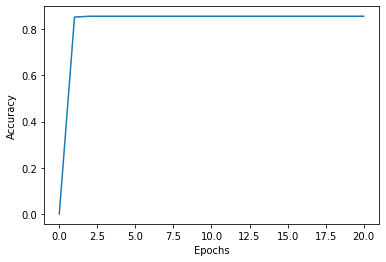

In [ ]:
plt.plot(acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()